In [1]:
def softmax(a):
    C = numpy.max(a)
    minus = a-C
    exp_a = numpy.exp(minus)
    sum_exp_a=numpy.sum(exp_a)
    y=exp_a/sum_exp_a
    return y


class neuralNetwork :
    def __init__(self,inputnodes,hiddennodes1,hideennodes2,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes1=hiddennodes1
        self.hnodes2=hideennodes2
        self.onodes=outputnodes
        
        self.lr=learningrate
        
        if self.hnodes1==0:
            self.wih=numpy.array(numpy.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.inodes)))
            self.who=numpy.array(numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2)))
        else:
            self.wih1=numpy.array(numpy.random.normal(0.0,pow(self.hnodes1,-0.5),(self.hnodes1,self.inodes)))
            self.wih2=numpy.array(numpy.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.hnodes1)))
            self.who=numpy.array(numpy.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2)))  
        pass
            
        self.activation_function=lambda x:scipy.special.expit(x)
        self.activation_function2=lambda b:softmax(b)
        
    pass
    
    
    def train(self,inputs_list,targets_list,mode):
        inputs=numpy.array(inputs_list,ndmin=2).T
        targets=numpy.array(targets_list,ndmin=2).T
        
        if self.hnodes1==0:
        
            hidden_inputs=numpy.dot(self.wih,inputs)
            hidden_outputs=self.activation_function(hidden_inputs)
        
            final_inputs=numpy.dot(self.who,hidden_outputs)
            final_outputs=self.activation_function2(final_inputs)
        
            output_errors=targets-final_outputs
            hidden_errors=numpy.dot(self.who.T,output_errors)       
        
            self.wih+=self.lr*numpy.dot((hidden_errors*hidden_outputs*(1-hidden_outputs)),numpy.transpose(inputs))
            self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs))
               
        else:
            hidden_inputs1=numpy.dot(self.wih1,inputs)
            hidden_outputs1=self.activation_function(hidden_inputs1)
        
            hidden_inputs2=numpy.dot(self.wih2,hidden_outputs1)
            hidden_outputs2=self.activation_function(hidden_inputs2)
        
            final_inputs=numpy.dot(self.who,hidden_outputs2)
            final_outputs=self.activation_function2(final_inputs)
        
        
            output_errors=targets-final_outputs
            hidden_errors2=numpy.dot(self.who.T,output_errors)
            hidden_errors1=numpy.dot(self.wih2.T, hidden_errors2)
        
            self.wih1+=self.lr*numpy.dot((hidden_errors1*hidden_outputs1*(1-hidden_outputs1)),numpy.transpose(inputs))        
            self.wih2+=self.lr*numpy.dot((hidden_errors2*hidden_outputs2*(1-hidden_outputs2)),numpy.transpose(hidden_outputs1))        
            self.who+=self.lr*numpy.dot((output_errors*final_outputs*(1-final_outputs)),numpy.transpose(hidden_outputs2))
        pass
        
        
        
        if mode=='w':
            return self.wih,self.who
        elif mode == 'o':
            #return hidden_outputs,final_outputs
            return final_outputs
        elif mode =='e':
            return output_errors,hidden_errors
    
    
    def query(self,inputs_list):
        inputs=numpy.array(inputs_list,ndmin=2).T
        
        if self.hnodes1==0:
            hidden_inputs=numpy.dot(self.wih,inputs)        
            hidden_outputs=self.activation_function(hidden_inputs)
        
            final_inputs=numpy.dot(self.who,hidden_outputs)        
            final_outputs=self.activation_function2(final_inputs)
            
        else:
            hidden_inputs1=numpy.dot(self.wih1,inputs)
            hidden_outputs1=self.activation_function(hidden_inputs1)
        
            hidden_inputs2=numpy.dot(self.wih2,hidden_outputs1)
            hidden_outputs2=self.activation_function(hidden_inputs2)
        
            final_inputs=numpy.dot(self.who,hidden_outputs2)
            final_outputs=self.activation_function2(final_inputs)
        
        return final_outputs
     

In [2]:
import numpy
import matplotlib.pyplot as plt
import scipy.special


# 입력, 은닉, 출력 노드의 수
input_nodes = 784
hidden_nodes1= 0
hidden_nodes2 =200
output_nodes = 10
 
# 학습률
learning_rate = 0.2
 
# 신경망의 인스턴스를 생성
n = neuralNetwork(input_nodes, hidden_nodes1,hidden_nodes2, output_nodes, learning_rate)

# train csv 파일을 리스트로 불러오기
training_data_file = open("mnist_train.csv", 'r',encoding='utf-8-sig')
training_data_list = training_data_file.readlines()
training_data_file.close()


In [3]:
# 신경망 학습시키기
 
epochs = 20
Acc=[]

for e in range(epochs):
    accuracy=[]
    print(e+1,'번째')
    for record in training_data_list:        
        all_values = record.split(',') # 레코드를 쉼표에 의해 분리
        
        # 입력 값의 범위와 값 조정
        inputs = (numpy.asfarray(all_values[1:])/255*0.99) +0.01    
        # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
        targets = numpy.zeros(n.onodes)+0.01
        # all_values[0]은 이 레코드에 대한 결과 값
        targets[int(all_values[0])] = 0.99
        
        #print("라벨 값 : ",int(all_values[0]))
        #print("학습 값 : ",numpy.argmax(n.train(inputs,targets,'o')))
        #print("-------------")      
   
        if (int(all_values[0])==numpy.argmax(n.train(inputs,targets,'o'))) :
            accuracy.append(1)
        else:
            accuracy.append(0)
            pass
          
    accuracy_array=numpy.asarray(accuracy)
    Acc.append(accuracy_array.sum()/len(training_data_list)*100)
    print('학습 정확도 : ',accuracy_array.sum()/len(training_data_list)*100,'%')
       
        
    


1 번째
학습 정확도 :  90.62 %
2 번째
학습 정확도 :  92.06666666666666 %
3 번째
학습 정확도 :  93.04 %
4 번째
학습 정확도 :  93.825 %
5 번째
학습 정확도 :  94.19 %
6 번째
학습 정확도 :  94.38 %
7 번째
학습 정확도 :  94.51666666666667 %
8 번째
학습 정확도 :  94.81 %
9 번째
학습 정확도 :  94.745 %
10 번째
학습 정확도 :  95.195 %
11 번째
학습 정확도 :  95.21 %
12 번째
학습 정확도 :  95.095 %
13 번째
학습 정확도 :  95.27 %
14 번째
학습 정확도 :  95.30166666666666 %
15 번째
학습 정확도 :  95.88333333333333 %
16 번째
학습 정확도 :  95.68666666666667 %
17 번째
학습 정확도 :  95.85833333333333 %
18 번째
학습 정확도 :  95.85000000000001 %
19 번째
학습 정확도 :  95.93833333333333 %
20 번째
학습 정확도 :  95.78833333333333 %


In [4]:
test_data_file=open("mnist_test_10.csv",'r')
test_data_list=test_data_file.readlines()
test_data_file.close()

mnist_train : 학습데이터
mnist_test : 테스트 데이터


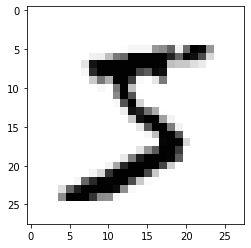

In [5]:
 all_values = training_data_list[0].split(',')
image_array=numpy.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array,cmap='Greys',interpolation='None')

In [6]:
# 신경망 테스트

scorecard=[]

for record in test_data_list :
    all_values = record.split(',')
    correct_label=int(all_values[0])
    print(correct_label,"correct label")
    inputs = (numpy.asfarray(all_values[1:])/255*0.99) +0.01 
    output=n.query(inputs)
    label=numpy.argmax(output)
    print(label, "network's answer ")
    print("---------------")
    if (label==correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

scorecard_array=numpy.asarray(scorecard)

print("performance = ",scorecard_array.sum()/scorecard_array.size*100,"%")

7 correct label
7 network's answer 
---------------
2 correct label
2 network's answer 
---------------
1 correct label
1 network's answer 
---------------
0 correct label
0 network's answer 
---------------
4 correct label
4 network's answer 
---------------
1 correct label
1 network's answer 
---------------
4 correct label
4 network's answer 
---------------
9 correct label
9 network's answer 
---------------
5 correct label
5 network's answer 
---------------
9 correct label
9 network's answer 
---------------
performance =  100.0 %


In [7]:
print("-------------------------------------------")
print("- 결과 -")
print("학습 정확도(",e+1, "에폭 실행",") : ",accuracy_array.sum()/len(training_data_list)*100,'%')
print("performance = ",scorecard_array.sum()/scorecard_array.size*100,"%")
print("-------------------------------------------")

-------------------------------------------
- 결과 -
학습 정확도( 20 에폭 실행 ) :  95.78833333333333 %
performance =  100.0 %
-------------------------------------------
